In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import csv
from collections import OrderedDict

In [2]:
data = pd.read_csv('data/covid_numbers.csv')

In [3]:
#check if there is unwanterd columns ?
print(data.columns)
inp = input("is there any unwanted coumns ? (y/n)")
if inp == 'y':
    column_name =  input("Enter column name :")
    del data[column_name]
    data.to_csv('data/covid_numbers.csv', index = True)

Index(['Unnamed: 0', 'srno', 'date', 'covid_cases', 'contact_cases',
       'patients_relieved', 'unknown_sources', 'Total_Active_Cases',
       'Death_rate'],
      dtype='object')
is there any unwanted coumns ? (y/n)y
Enter column name :Unnamed: 0


In [4]:
data

,srno,date,covid_cases,contact_cases,patients_relieved,unknown_sources,Total_Active_Cases,Death_rate
0,1,04/08/2020,1083,902,1021,71,11543,3
1,2,05/08/2020,1195,971,1234,79,11495,7
2,3,06/08/2020,1298,1017,800,76,11986,3
3,4,07/08/2020,1251,1061,814,73,12414,5
4,5,08/08/2020,1420,1216,1715,92,12112,4
5,6,09/08/2020,1211,1026,970,103,12350,2
6,7,10/08/2020,1184,956,784,114,12740,7
7,8,11/08/2020,1417,1242,1426,105,12724,5
8,9,12/08/2020,1212,1068,880,45,13048,6
9,10,13/08/2020,1564,1380,766,98,13842,3


In [5]:
sample = data
continue_ = 'n'
continue_ = input("Do you have to update the data  : (y/n)")
while(continue_ =='y'):
    print(" Options !!")
    print("\tAdd Column : c \n\tAdd row values : r")
    op = input("Enter your option")
    if op == 'c' :
        print("-------------------")
        print("Adding column")
        print("-------------------")
        column_name = input("Enter Column name : ")
        column_length = len(sample)
        print("Enter your entries {0} :".format("must be length of  "),len(sample))
        column = []
        for i in range(column_length):
            value = input()
            column.append(value)
        sample[column_name] = np.array(column)
        print(sample)
        save = input("Do you want to save changes (y/n): ")
        if save == 'y' : 
            data = sample
        continue_ = input("do you want to add more : (y/n)")
    if op == 'r' :
        print("-------------------")
        print("Adding row values")
        print("-------------------")
        row = {}
        d=[]
        i=0
        for key in sample.columns:
            if i==1 :
                value = input("Enter {0}".format(key))
            else :
                value = int(input("Enter {0}".format(key)))
            row.update({key:value})
            i = i+1
        d.append(row)    
        sample = sample.append(d,True)
        print(sample)
        save = input("Do you want to save these changes (y/n): ")
        if save == 'y' : 
            data = sample
            print(data)
        continue_ = input("do you want to add more : (y/n)")
        
print("Final : ")
print(data)
final_save = input("Do you want to overwrite covid_numbers.csv : (y/n) ")
if final_save == 'y':
    data.to_csv('data/covid_numbers.csv', index = True)
    print("Successully saved data")
        
        
        
            
        
        
            
            
            

        
        

Do you have to update the data  : (y/n)y
 Options !!
	Add Column : c 
	Add row values : r
Enter your optionr
-------------------
Adding row values
-------------------
Enter srno18
Enter date21/08/2020
Enter covid_cases1983
Enter contact_cases1777
Enter patients_relieved1419
Enter unknown_sources109
Enter Total_Active_Cases18676
Enter Death_rate12
    srno        date  covid_cases  contact_cases  patients_relieved  \
0      1  04/08/2020         1083            902               1021   
1      2  05/08/2020         1195            971               1234   
2      3  06/08/2020         1298           1017                800   
3      4  07/08/2020         1251           1061                814   
4      5  08/08/2020         1420           1216               1715   
5      6  09/08/2020         1211           1026                970   
6      7  10/08/2020         1184            956                784   
7      8  11/08/2020         1417           1242               1426   
8      9  12

In [6]:
data.columns


Index(['srno', 'date', 'covid_cases', 'contact_cases', 'patients_relieved',
       'unknown_sources', 'Total_Active_Cases', 'Death_rate'],
      dtype='object')

In [7]:
fieldnames = ('','srno', 'date', 'covid_cases', 'contact_cases', 'patients_relieved',
       'unknown_sources', 'Total_Active_Cases', 'Death_rate')

entries = []
#the with statement is better since it handles closing your file properly after usage.
with open('data/covid_numbers.csv', 'r') as csvfile:
    #python's standard dict is not guaranteeing any order, 
    #but if you write into an OrderedDict, order of write operations will be kept in output.
    reader = csv.DictReader(csvfile, fieldnames)
    for row in reader:
        entry = OrderedDict()
        for field in fieldnames:
            entry[field] = row[field]
        entries.append(entry)

output = {
    "Data": entries
}

with open('data/covid_numbers.json', 'w') as jsonfile:
    json.dump(output, jsonfile)
    jsonfile.write('\n')

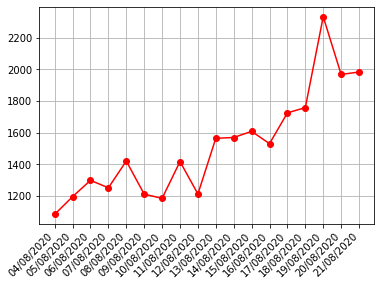

In [8]:
import matplotlib
fig,ax=plt.subplots()
plt.plot(data['date'],data['covid_cases'],color='red',marker='o')
plt.xticks(rotation=45,ha='right')
plt.grid(True)
plt.show()

In [9]:
fig.savefig('Analysis_Covid_Daily_Cases.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

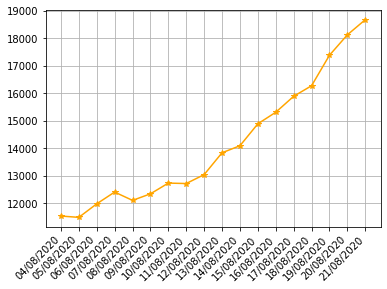

In [10]:
import matplotlib
fig2,ax2=plt.subplots()
plt.plot(data['date'],data['Total_Active_Cases'],color='orange',marker='*')
plt.xticks(rotation=45,ha='right')
plt.grid(True)
plt.show()

In [11]:
fig2.savefig('Analysis_TotalActiveCases.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

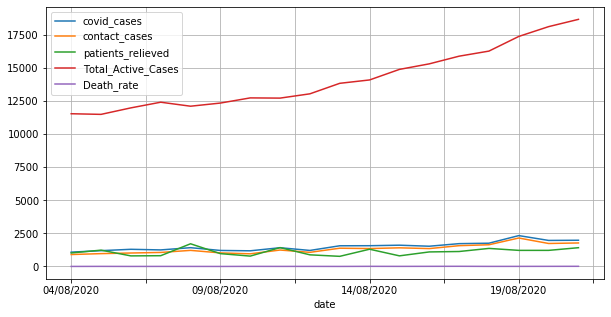

In [12]:
plot_data = data.iloc[:,[1,2,3,4,6,7]]
plot_data.set_index('date').plot(figsize=(10,5), grid=True)
plt.show()

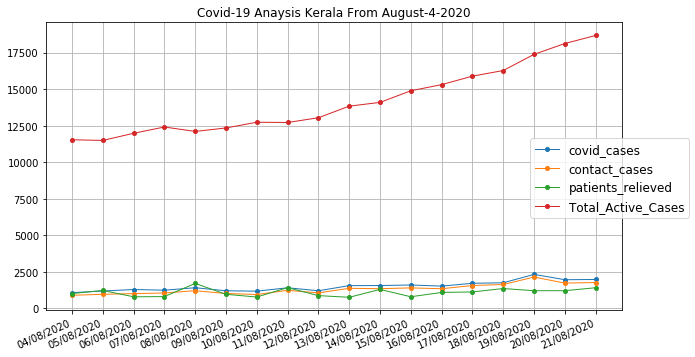

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(data['date'],data[['covid_cases','contact_cases','patients_relieved','Total_Active_Cases']],'-o',linewidth=1, markersize=4)
plt.xticks(rotation=24,ha='right')
plt.title('Covid-19 Anaysis Kerala From August-4-2020')
plt.grid(True)
plt.figlegend(labels=('covid_cases','contact_cases','patients_relieved','Total_Active_Cases'),loc='center right',fontsize='large')
fig.savefig('OverallAnalysis.jpg')

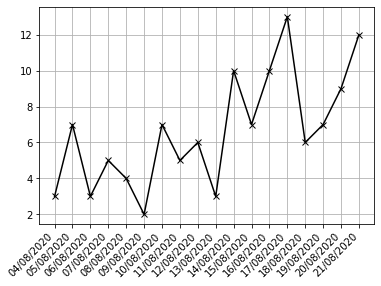

In [14]:
import matplotlib
fig3,ax=plt.subplots()
plt.plot(data['date'],data['Death_rate'],color='black',marker='x')
plt.xticks(rotation=45,ha='right')
plt.grid(True)
plt.show()

In [15]:
fig3.savefig('Analysis_Death_rate.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')